In [1]:
import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
# get all categories 
results = sp.categories(country='CH')['categories']
categories = results['items']
while results['next']:
    results = sp.next(results)['categories']
    categories.extend(results['items'])
print(f"{len(categories)} categories found")

36 categories found


In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
df_categories = pd.DataFrame(categories).drop(labels=['href', 'icons'], axis='columns')
df_categories

,id,name
0,toplists,Top Lists
1,hiphop,Hip-Hop
2,pop,Pop
3,mood,Mood
4,french_variety,French Pop
5,party,Party
6,edm_dance,Electronic/Dance
7,rock,Rock
8,chill,Chill
9,wellness,Wellness


In [4]:
selected_category_ids = [
#     'edm_dance',
#     'rock',
#     'chill',
#     'roots',
#     'soul',
#     'punk',
#     'reggae',
#     'blues',
#     'funk'
    'workout'
]

In [5]:
playlist_ids = set()
for cat_id in selected_category_ids:
    results = sp.category_playlists(cat_id)['playlists']
    new_ids = [plist['id'] for plist in results['items']]
    playlist_ids.update(new_ids)
    print(f"added {len(new_ids)} playlists for category {cat_id}")
    while results['next']:
        results = sp.next(results)['playlists']
        new_ids = [plist['id'] for plist in results['items']]
        playlist_ids.update(new_ids)
        print(f"added {len(new_ids)} playlists for category {cat_id}")
print(f"{len(playlist_ids)} playlists in total")        

added 20 playlists for category workout
added 20 playlists for category workout
added 18 playlists for category workout
58 playlists in total


In [6]:
[sp.playlist(pid)['name'] for pid in playlist_ids]

['Yoga Electronica',
 'Latin Cardio',
 "Michelle Obama's Workout Playlist",
 'Rock Me UP!',
 'Indie Workout',
 'Zumba® Beats',
 'Hatha Yoga',
 'Metal Charge 180 BPM',
 'Body & Soul',
 'Tollywood Hunks',
 'Energetic Run 160-165 BPM',
 'Indie Kicks 150–155 BPM',
 'Running to Rock 170-190 BPM',
 'Tropical House Run 190 BPM',
 'Powerwalk!',
 'Piano Yoga',
 'Power Run 145 BPM',
 'The Climb 170-175 BPM',
 "Rock 'n' Run 160-180 BPM",
 'K-Town Machos',
 'Pop Warmup 130 BPM',
 'Acoustic Pilates',
 'Beast Mode',
 'Cardio',
 'Lactic Acid Run 175 BPM',
 'Fast Pop Run 180 BPM',
 'Born To Run 150 BPM',
 'Fun Run 150–165 BPM',
 'Sunrise Yoga',
 '2 . 24',
 'Fit mit Beat',
 'Adrenaline Workout',
 'Run Wild',
 'Pilates Lounge',
 'Just Get Going! 155 BPM',
 'Locked In',
 'Extreme Metal Workout',
 'Hype',
 'Yoga & Meditation',
 "Runner's Club 160 BPM",
 'Rock Your Body',
 "Run 'N' Bass 170-175 BPM",
 'Cool Down',
 'Endorphin Rush',
 'Workout',
 'Eat Sleep Run Repeat 140 BPM',
 'Power Workout',
 'Workout T

In [7]:
track_ids = set()
for pl_id in playlist_ids:
    tracks = sp.playlist(pl_id)['tracks']
    new_ids = set([item['track']['id'] for item in tracks['items']])
    while tracks['next']:
        tracks = sp.next(tracks)
        new_ids.update([item['track']['id'] for item in tracks['items']])
    track_ids.update(new_ids)
    print(f"added {len(new_ids)} tracks from playlist {pl_id}")

added 37 tracks from playlist 37i9dQZF1DWYUYYlhkTuEn
added 75 tracks from playlist 37i9dQZF1DWXmQEAjlxGhi
added 35 tracks from playlist 37i9dQZF1DX2BCKQiTaN5o
added 89 tracks from playlist 37i9dQZF1DX0wiundViT27
added 100 tracks from playlist 37i9dQZF1DXaRL7xbcDl7X
added 64 tracks from playlist 37i9dQZF1DX7cmFV9rWM0u
added 30 tracks from playlist 37i9dQZF1DWZvpVE2NxPV2
added 40 tracks from playlist 37i9dQZF1DX06VUQ1GoKge
added 51 tracks from playlist 37i9dQZF1DWXUtxBFupUW9
added 55 tracks from playlist 37i9dQZF1DX4H5837Y8I1n
added 48 tracks from playlist 37i9dQZF1DWT6anPZiHuxz
added 40 tracks from playlist 37i9dQZF1DWZq91oLsHZvy
added 75 tracks from playlist 37i9dQZF1DWZUTt0fNaCPB
added 33 tracks from playlist 37i9dQZF1DWSTc9FdySHtz
added 80 tracks from playlist 37i9dQZF1DX9BXb6GsGCLl
added 97 tracks from playlist 37i9dQZF1DX7R7Bjxm48PR
added 23 tracks from playlist 37i9dQZF1DWUxdwkOJZYCJ
added 48 tracks from playlist 37i9dQZF1DWV3VLITCZusq
added 30 tracks from playlist 37i9dQZF1DWXx3T

In [8]:
pd.set_option('display.max_rows', 10)
df_audio_features = pd.DataFrame(spotify.get_audio_features_for_tracks(sp, list(track_ids))).drop(
    ['track_href', 'analysis_url', 'type', 'uri', 'loudness'], axis=1)
df_audio_features

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.715,0.9220,1,1,0.0339,0.003330,0.088600,0.0924,0.7540,124.979,6IgaAwdAtKtozYIrYxPzCX,226307,4
1,0.475,0.6440,9,1,0.0326,0.000870,0.279000,0.1230,0.5680,149.838,30SjdIdTMhBSe33nFnBFkC,250453,4
2,0.719,0.9370,11,1,0.0394,0.077500,0.739000,0.7220,0.1830,125.006,0MohhaKyjH8w8XAc2zHXGB,188160,4
3,0.781,0.8290,7,1,0.2410,0.034300,0.005020,0.0826,0.7330,102.026,0osnJEcmFX4tzO9MS8feMn,305560,4
4,0.806,0.6800,10,0,0.0715,0.182000,0.000013,0.2110,0.7980,125.058,75awRswVFJGlDwUHbpPY4S,134400,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,0.662,0.8950,1,1,0.0660,0.096000,0.866000,0.1400,0.6670,159.958,3mT8VOOnZXJgZeSXFIwvfX,243000,4
3571,0.353,0.9800,4,0,0.2040,0.000011,0.868000,0.2860,0.0607,125.031,5Db1yq0HRGZFOARJVgLvlP,227398,4
3572,0.610,0.9310,4,0,0.0633,0.016700,0.000000,0.0585,0.9710,154.874,6ZXRfraYr0sKNd9TKW5XQx,152813,4
3573,0.236,0.0204,1,1,0.0370,0.966000,0.810000,0.1490,0.0460,86.077,5OWitBhgqlcQK3xUwibEya,131284,4


In [9]:
# save tracks
import json
import os
folder = 'data'
filename = 'spotify_workout_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    df_audio_features.to_json(path_or_buf=f, orient='records', indent=4)

##### read the file

In [10]:
import json
import os
folder = 'data'
filename = 'spotify_workout_tracks.json'
with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
    tracks = json.load(f)
len(tracks)

3575

##### select the suitable tracks:

In [11]:
tempo_min, tempo_max = 126, 130
track_ids = list(df_audio_features[
    (df_audio_features['tempo'] >= tempo_min) & 
    (df_audio_features['tempo'] <= tempo_max) & 
    (df_audio_features['danceability'] >= 0.8) &
    (df_audio_features['liveness'] <= 0.4) &
    (df_audio_features['speechiness'] <= 0.33)
]['id'])
len(track_ids)

30

In [12]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test BPM {tempo_min} - {tempo_max} (Spotify Workout Tracks)", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 5yZozHqnOK9mMQOJxGF7gm


In [13]:
# add tracks to playlist
spotify.add_tracks(sp, playlist_id, track_ids, skip_duplicates=True)

Playlist has 0 existing tracks
Skipping duplicates: True
30 tracks to be added
30 tracks added
OK


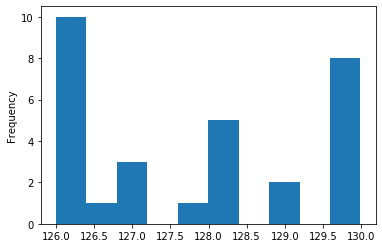

In [14]:
max_ids = 50
tracks_audio_features = []
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_audio_features['tempo'].plot.hist()